<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [4]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-4-98fa4fa7de4e>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [6]:
energia.head(15)

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084
5,2004-06-01,3433443,7501655,2159479
6,2004-07-01,3457623,7580439,2233526
7,2004-08-01,3453322,7710196,2192652
8,2004-09-01,3596160,7747917,2359085
9,2004-10-01,3608130,7762817,2415036


In [7]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

**Resposta:** a granularidade é mensal , indo de um em um mes, começando em janeiro de 2004 até dezembro de 2020.


### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [8]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [10]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-10-6a19c3c602dc>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [11]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [12]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

**Resposta:** a granularidade é diaria, indo de um em um dia, começando em 15 de julho de 2018 indo até 31 de dezembro de 2020

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [14]:
# resposta da questão 2.1.a
energia = energia.set_index(keys=['referencia'])
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [16]:
# resposta da questão 2.1.b
energia = energia.loc['2019-01-01':'2020-12-31']
energia.shape

(24, 3)

In [19]:
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2019-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   residencial  24 non-null     int64
 1   industrial   24 non-null     int64
 2   comercial    24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [20]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])
temperatura.head(1)

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [21]:
# resposta da questão 2.1.b
temperatura = temperatura.loc['2019-01-01':'2020-12-31']
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  731 non-null    int64  
 1   temp-media-rj  644 non-null    float64
 2   temp-media-mg  724 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


In [22]:
temperatura.head(4)

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [23]:
temperatura[temperatura.isnull().any(axis=1)]

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2020-07-01,17,NaN,19.0
2020-07-02,12,NaN,20.0
2020-07-03,12,NaN,20.0
2020-07-04,15,NaN,20.0
2020-07-05,18,NaN,20.0
...,...,...,...
2020-11-26,23,NaN,22.0
2020-11-27,22,NaN,23.0
2020-11-28,21,NaN,23.0


In [24]:
# resposta da questão 2.2.c
temperatura = temperatura.fillna(temperatura.mean())
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  731 non-null    int64  
 1   temp-media-rj  731 non-null    float64
 2   temp-media-mg  731 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [25]:
# resposta da questão 2.2.d
temperatura['temp-media'] = temperatura.mean(axis=1)
temperatura.head(1)

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [27]:
# resposta da questão 2.2.f
temperatura = temperatura.resample(rule='ME').mean()
temperatura.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

<ipython-input-29-7814e1e8a1c3>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker="1", palette="pastel")


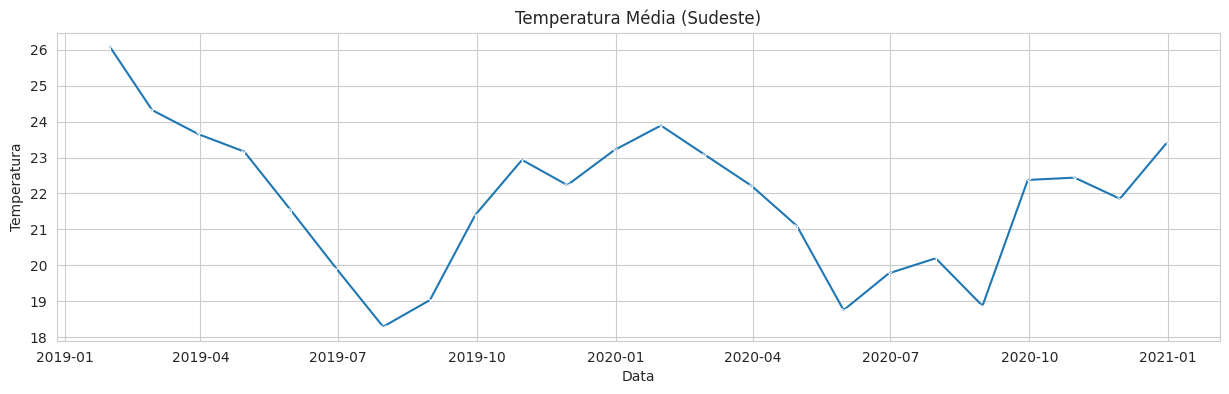

In [29]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temperatura Média (Sudeste)', ylabel='Temperatura', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)





 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

<ipython-input-30-f8795f127ba6>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")


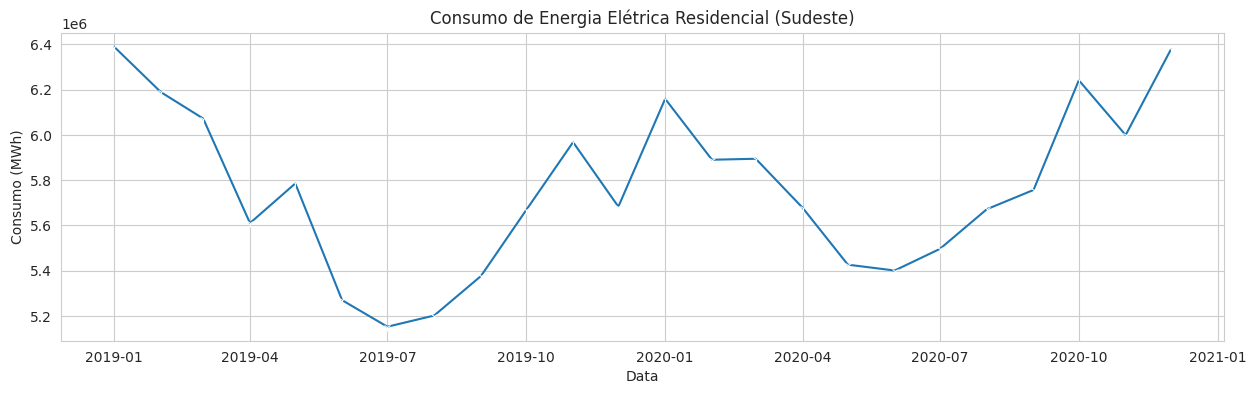

In [30]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [31]:
# resposta da questão 3.1.c
np.corrcoef(energia['residencial'], temperatura['temp-media'])

array([[1.        , 0.81934966],
       [0.81934966, 1.        ]])

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Sim , 0.81 indica um correlação forte e positiva, logo tem uma relação significativa na mesma direção.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

In [32]:
np.corrcoef(energia['comercial'], temperatura['temp-media'])

array([[1.      , 0.800404],
       [0.800404, 1.      ]])

**Resposta:**Sim , 0.80 indica um correlação forte e positiva, logo tem uma relação significativa na mesma direção.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

---

In [33]:
np.corrcoef(energia['industrial'], temperatura['temp-media'])

array([[1.       , 0.2990072],
       [0.2990072, 1.       ]])

**Resposta:** Não, 0.29 indica uma correlação fraca e positiva,ou seja não há uma relação linear consistente.